In [1]:
import numpy as np
import pandas as pd

In [2]:
#List of possible encodings to try
encodings=['utf-8','latin1','ISO-8859-1','cp1252']
file_path='/content/drive/MyDrive/spam.csv'

#attempt to read the csv file with different encodings
for encoding in encodings:
  try:
    df=pd.read_csv(file_path,encoding=encoding)
    print(f"File successfully read with encoding: {encoding}")
    break
  except UnicodeDecodeError:
    print(f"Failed to read with encoding: {encoding}")
    continue
#If the loop completes without success, df will not be defined
if 'df' in locals():
  print("CSV file has been successfully loaded.")
else:
  printf("All encoding attempts failed. Unable to read the csv file.")

Failed to read with encoding: utf-8
File successfully read with encoding: latin1
CSV file has been successfully loaded.


In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3738,ham,Did you stitch his trouser,NaN,NaN,NaN
5083,ham,Aiya we discuss later lar... Pick Ì_ up at 4 i...,NaN,NaN,NaN
4934,ham,"Hey babe, how's it going ? Did you ever figure...",NaN,NaN,NaN
1665,ham,Dunno cos i was v late n when i reach they ins...,NaN,NaN,NaN
1095,ham,Ryder unsold.now gibbs.,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
#1. Data cleaning
#2. EDA
#3. Text processing
#4. Model Building
#5. Evaluation
#6. Improvement
#7. Website
#8. Deploy

# 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
2880,ham,Printer is cool. I mean groovy. Wine is groovying
827,ham,Hey. You got any mail?
4706,ham,Wif my family booking tour package.
1983,ham,I wnt to buy a BMW car urgently..its vry urgen...
3839,ham,HEY MATE! HOWS U HONEY?DID U AVE GOOD HOLIDAY?...


In [9]:
#renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [10]:
df.sample(5)

,target,text
4877,spam,No 1 POLYPHONIC tone 4 ur mob every week! Just...
937,ham,K:)k.are you in college?
5304,ham,Pls ask macho how much is budget for bb bold 2...
4006,ham,I'm reaching home in 5 min.
1530,ham,I think chennai well settled?


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [12]:
df['target']=encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
#check for duplicated values
df.duplicated().sum()

403

In [15]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

# 2. EDA

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

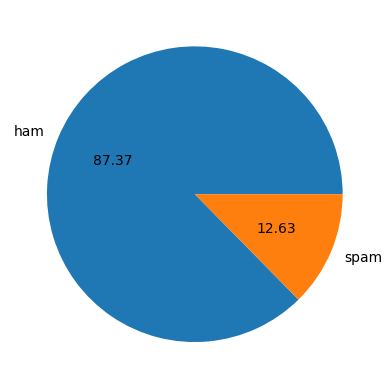

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
#Big chunk of ham and very less spam so out data is not balanced

In [22]:
import nltk
!pip install nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
df['num_characters']=df['text'].apply(len)   #number for char

df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
#number of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))  #words count

df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
#sentence
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
#targeting ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
#targeting spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

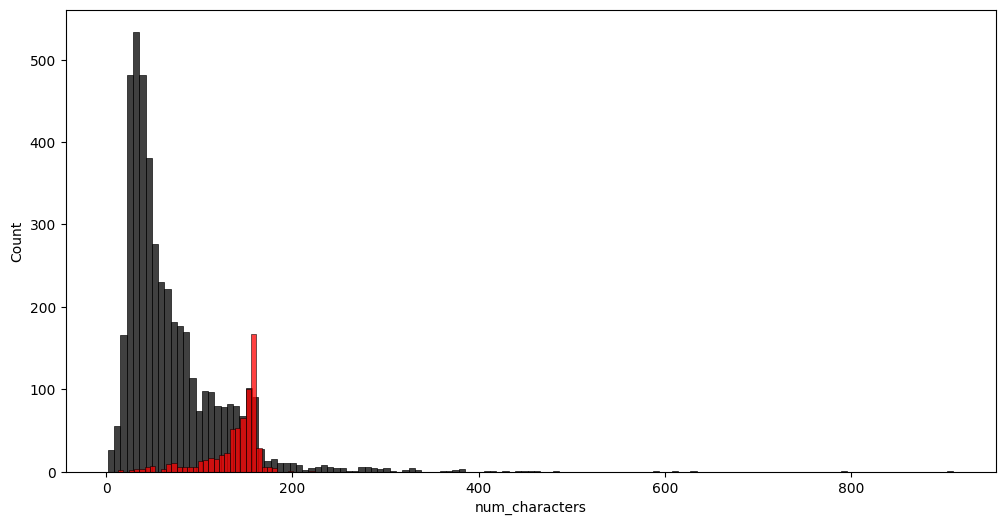

In [30]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'],color='black')
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

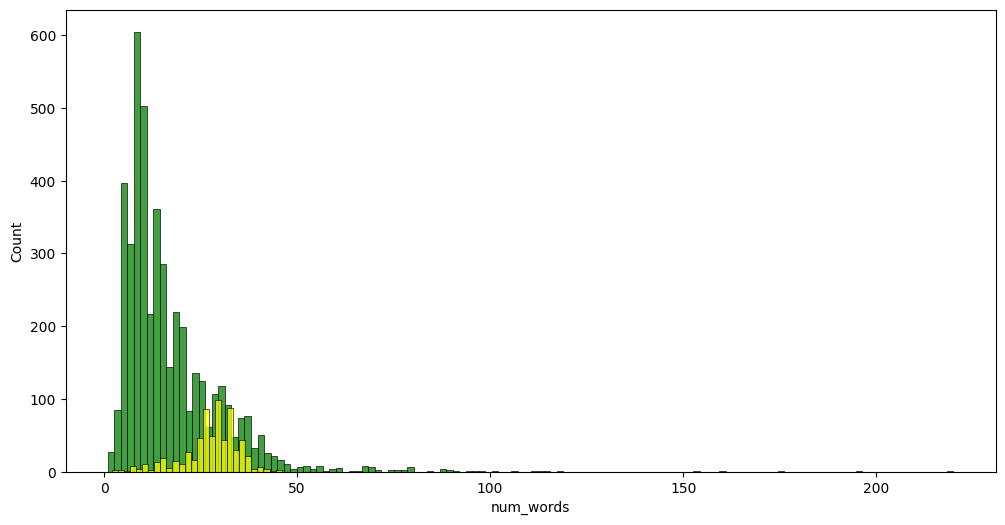

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'],color='green')
sns.histplot(df[df['target']==1]['num_words'],color='yellow')

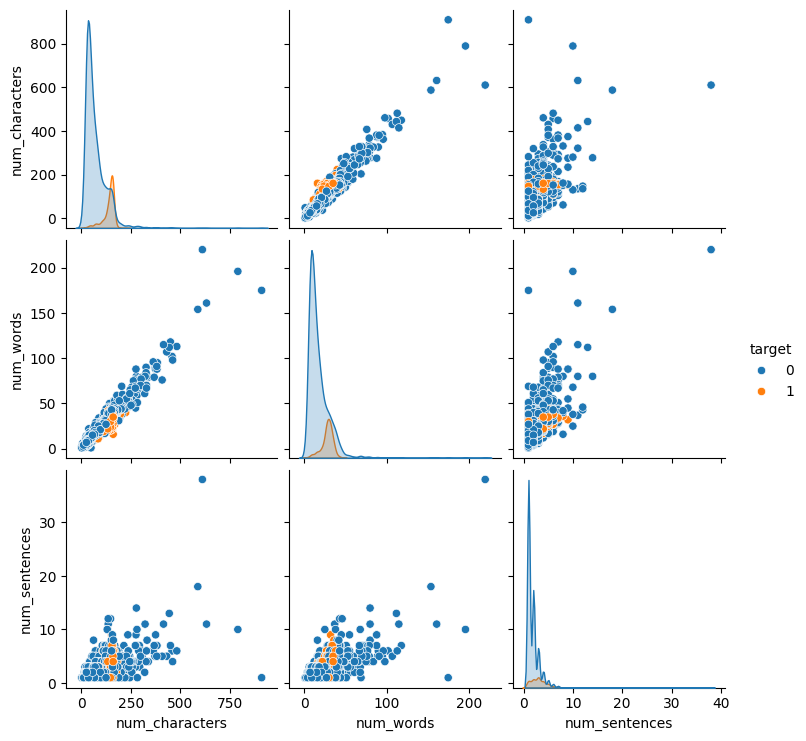

In [32]:
sns.pairplot(df,hue='target')

#3. Data Processing

    Lower Case
    
    Tokenization

    Removing special characters

    Removing stop words and punctuation

    Stemming

In [33]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords')

ps=PorterStemmer()

def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

# Call the function and store the result in a variable
transformed_sample = transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
print(transformed_sample)

# Apply the function to your DataFrame
df['transformed_text']=df['text'].apply(transform_text)  # Use the function name here
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


gon na home soon want talk stuff anymor tonight k cri enough today


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [34]:
!pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [35]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

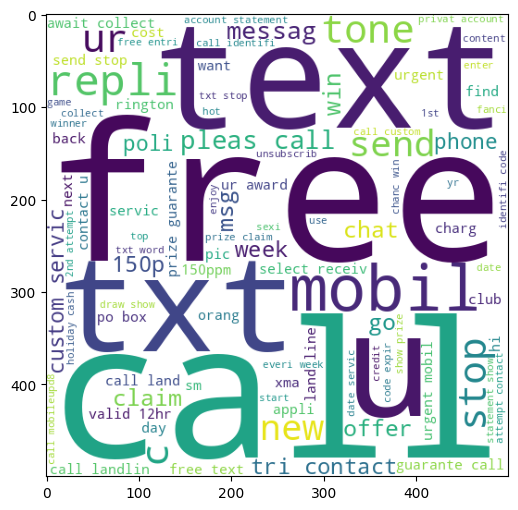

In [36]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

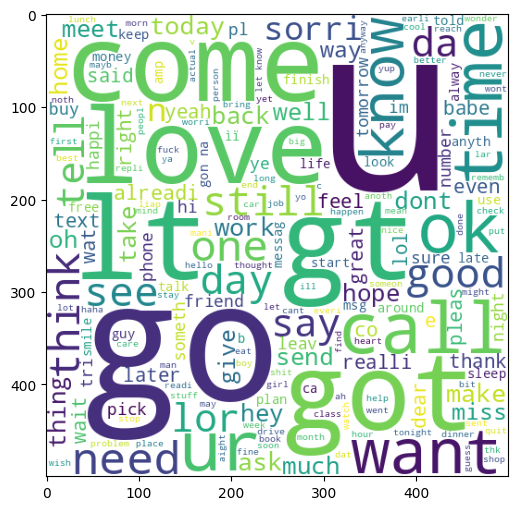

In [37]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(ham_wc)


In [38]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [39]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

len(spam_corpus)


9939

In [40]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

len(ham_corpus)

35404

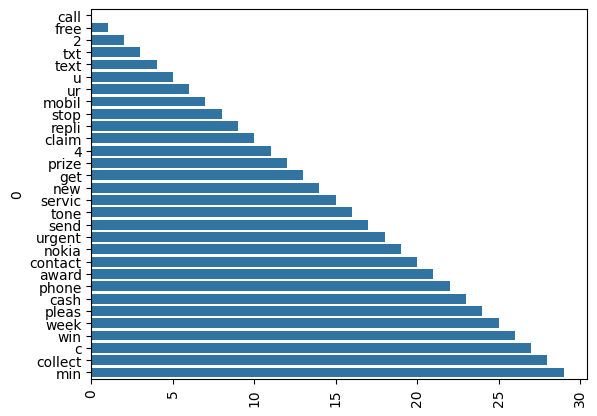

In [41]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()

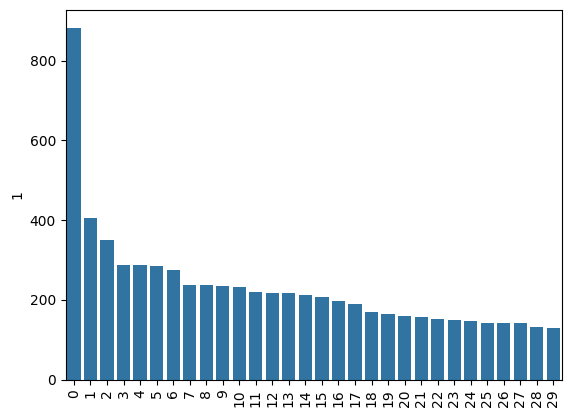

In [42]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [43]:
#Text vectorization
#using Bag of words

df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4. Building the model

In [44]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [45]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X=np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [47]:
X.shape

(5169, 6709)

In [48]:
y=df['target'].values

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [50]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [51]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [52]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8723404255319149
[[785 111]
 [ 21 117]]
0.5131578947368421


In [53]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9622823984526112
[[886  10]
 [ 29 109]]
0.9159663865546218


In [54]:
#tfidf ---> mnb

In [55]:
!pip install xgboost

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [57]:
svc= SVC(kernel="sigmoid", gamma=1.0)
knc= KNeighborsClassifier()
anb =MultinomialNB()
dtc= DecisionTreeClassifier(max_depth=5)
lrc= LogisticRegression (solver='liblinear', penalty='l1')
rfc =RandomForestClassifier(n_estimators=50, random_state=2)
abc= AdaBoostClassifier(n_estimators=50, random_state=2)
bc= BaggingClassifier(n_estimators=50, random_state=2)
etc= ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt= GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50, random_state=2)

In [58]:
clfs = {
'SVC': svc,
'KN': knc,
'NB': mnb,
'DT': dtc,
'LR': lrc,
'RF': rfc,
'AdaBoost': abc,
'BgC': bc,
'ETC': etc,
'GBDT': gbdt,
'xgb': xgb
}

In [59]:
def train_classifier(clf,X_train,y_train,x_test,y_test):
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)
  return accuracy,precision

In [60]:
train_classifier(mnb,X_train,y_train,X_test,y_test)

(0.9622823984526112, 0.9159663865546218)

In [61]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
  current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
  print("For ",name)
  print("Accuracy- ",current_accuracy)
  print("Precision- ",current_precision)
  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  SVC
Accuracy-  0.8665377176015474
Precision-  0.0
For  KN
Accuracy-  0.8887814313346228
Precision-  0.6885245901639344
For  NB
Accuracy-  0.9622823984526112
Precision-  0.9159663865546218
For  DT
Accuracy-  0.9497098646034816
Precision-  0.8771929824561403
For  LR
Accuracy-  0.9729206963249516
Precision-  0.9910714285714286
For  RF
Accuracy-  0.971953578336557
Precision-  0.990990990990991
For  AdaBoost
Accuracy-  0.9680851063829787
Precision-  0.9133858267716536
For  BgC
Accuracy-  0.9680851063829787
Precision-  0.9069767441860465
For  ETC
Accuracy-  0.97678916827853
Precision-  0.9913793103448276
For  GBDT
Accuracy-  0.9516441005802708
Precision-  0.9313725490196079
For  xgb
Accuracy-  0.9709864603481625
Precision-  0.9426229508196722


In [62]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(),
                                'Accuracy': accuracy_scores,
                                'Precision': precision_scores}).sort_values('Precision', ascending=False)
performance_df

,Algorithm,Accuracy,Precision
8,ETC,0.976789,0.991379
4,LR,0.972921,0.991071
5,RF,0.971954,0.990991
10,xgb,0.970986,0.942623
9,GBDT,0.951644,0.931373
2,NB,0.962282,0.915966
6,AdaBoost,0.968085,0.913386
7,BgC,0.968085,0.906977
3,DT,0.949710,0.877193
1,KN,0.888781,0.688525


In [63]:
performance_df1=pd.melt(performance_df,id_vars='Algorithm')
performance_df1

,Algorithm,variable,value
0,ETC,Accuracy,0.976789
1,LR,Accuracy,0.972921
2,RF,Accuracy,0.971954
3,xgb,Accuracy,0.970986
4,GBDT,Accuracy,0.951644
5,NB,Accuracy,0.962282
6,AdaBoost,Accuracy,0.968085
7,BgC,Accuracy,0.968085
8,DT,Accuracy,0.949710
9,KN,Accuracy,0.888781


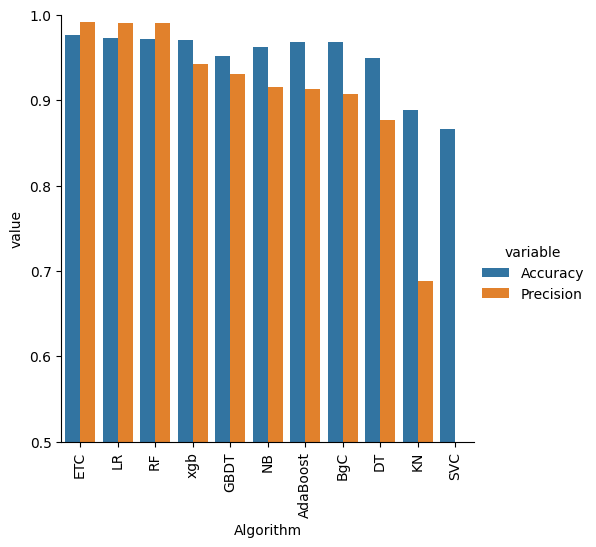

In [64]:
sns.catplot(x='Algorithm',y='value',
            hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [65]:
#model improve
#1.change max_features parameter of TfIdf

In [66]:
temp_df = pd.DataFrame({'Algorithm': clfs.keys(),
                                'Accuracy_max_ft_3000': accuracy_scores,
                                'Precision_max_ft_3000': precision_scores}).sort_values('Precision_max_ft_3000', ascending=False)


In [67]:
new_df=performance_df.merge(temp_df,on='Algorithm')
new_df_scaled=new_df.merge(temp_df,on='Algorithm')
temp_df=pd.DataFrame({'Algorithm': clfs.keys(),
                                'Accuracy_num_chars': accuracy_scores,
                                'Precision_num_chars': precision_scores}).sort_values('Precision_num_chars', ascending=False)
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y,Accuracy_num_chars,Precision_num_chars
0,ETC,0.976789,0.991379,0.976789,0.991379,0.976789,0.991379,0.976789,0.991379
1,LR,0.972921,0.991071,0.972921,0.991071,0.972921,0.991071,0.972921,0.991071
2,RF,0.971954,0.990991,0.971954,0.990991,0.971954,0.990991,0.971954,0.990991
3,xgb,0.970986,0.942623,0.970986,0.942623,0.970986,0.942623,0.970986,0.942623
4,GBDT,0.951644,0.931373,0.951644,0.931373,0.951644,0.931373,0.951644,0.931373
5,NB,0.962282,0.915966,0.962282,0.915966,0.962282,0.915966,0.962282,0.915966
6,AdaBoost,0.968085,0.913386,0.968085,0.913386,0.968085,0.913386,0.968085,0.913386
7,BgC,0.968085,0.906977,0.968085,0.906977,0.968085,0.906977,0.968085,0.906977
8,DT,0.949710,0.877193,0.949710,0.877193,0.949710,0.877193,0.949710,0.877193
9,KN,0.888781,0.688525,0.888781,0.688525,0.888781,0.688525,0.888781,0.688525


In [68]:
#voting Classifier
svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
from sklearn.ensemble import VotingClassifier

In [69]:
voting=VotingClassifier(estimators=[('svm', svc),('nb',mnb),('et',etc)],voting='soft')


In [70]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [72]:
y_pred=voting.predict(X_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred))

Accuracy 0.9632495164410058
Precision 1.0


In [73]:
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [74]:
from sklearn.ensemble import StackingClassifier
clf=StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred))

In [77]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [79]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Sample data and corresponding labels
X_train = ['Sample text 1', 'Sample text 2', 'Sample text 3']  # Corrected to strings
y_train = [0, 1, 0]  # 0 for negative, 1 for positive

# Create and train TfidfVectorizer
tfidf = TfidfVectorizer(lowercase=True, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)  # Now operates on strings

# Create and train Multinomial Naive Bayes model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Save the trained TfidfVectorizer and Naive Bayes model
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)
with open('model.pkl', 'wb') as m:
    pickle.dump(model, m)